<a href="https://colab.research.google.com/github/Amrutha131204/dllab/blob/main/exp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential  # Changed 'sequential' to 'Sequential'
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
maxlen=200
x_train=pad_sequences(x_train, maxlen=maxlen)
x_test=pad_sequences(x_test, maxlen=maxlen)

In [7]:
model=Sequential()
model.add(Dense(128, activation='relu', input_shape=(maxlen,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4935 - loss: 401.0233 - val_accuracy: 0.5018 - val_loss: 1.3064
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5004 - loss: 13.9262 - val_accuracy: 0.5026 - val_loss: 0.7296
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5015 - loss: 3.0252 - val_accuracy: 0.5005 - val_loss: 0.7138
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5034 - loss: 1.7569 - val_accuracy: 0.5066 - val_loss: 0.7022
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5041 - loss: 1.2667 - val_accuracy: 0.5074 - val_loss: 0.6946
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5027 - loss: 1.1227 - val_accuracy: 0.5003 - val_loss: 0.6956
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4919 - loss: 1.0855 - val_accuracy: 0.5007 - val_loss: 0.6949
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4944 - loss: 0.9495 - val_accuracy:

In [11]:
scores=model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 50.18%


782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


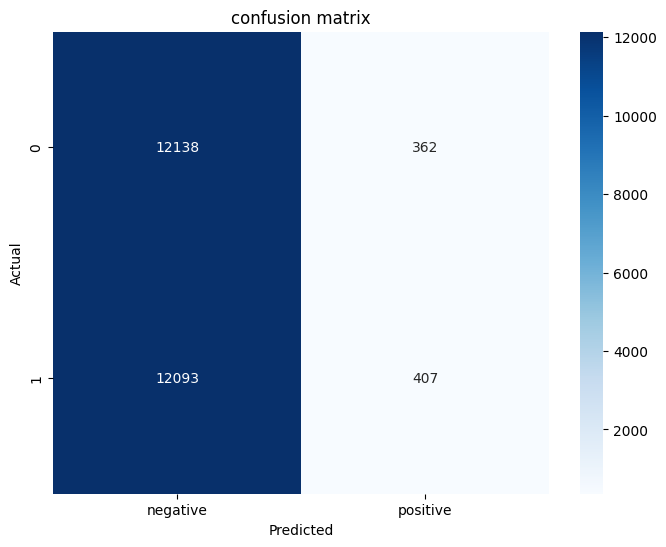

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#  Get predictions from the model
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5) # Convert probabilities to binary predictions

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["negative", "positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("confusion matrix")
plt.show()